# Setup

## Look around

In [47]:
#%ls

In [48]:
#%ls ../results/

## Import Modules

### Standard imports

In [3]:
import pickle
import json

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

from util_scripts.plotting_functions_and_vars import datasets_to_rounding_precision

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [5]:
# root = '../backup_results'
root = '../results'

In [6]:
dataset = 'esol'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'reproducing'
assert grid_search_type in ['reproducing', 'extended']

## Titles, Units and Labels for datasets

In [7]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [8]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [9]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


In [10]:
rp = datasets_to_rounding_precision[dataset]
rp

2

## CHOOSE metric to display

In [11]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [12]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [13]:
%ls ../results/

esol_original_extended_full_multiple_ci_runs_pred_gp.csv
esol_original_extended_full_multiple_ci_runs_pred_rf.csv
esol_original_extended_full_multiple_ci_runs_pred_xgb.csv
esol_original_extended_full_multiple_ci_runs_std_gp.csv
esol_original_extended_full_multiple_ci_runs_std_rf.csv
esol_original_extended_full_multiple_ci_runs_true_gp.csv
esol_original_extended_full_multiple_ci_runs_true_rf.csv
esol_original_extended_full_multiple_ci_runs_true_xgb.csv
esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_ran

In [14]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [15]:
best_params

{'1024ecfp-4': {'rf': {'rf__n_estimators': 500},
  'xgb': {'xgb__n_estimators': 350,
   'xgb__max_depth': 3,
   'xgb__learning_rate': 0.3},
  'krr': {'krr__alpha': 0.01},
  'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}}

In [16]:
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_params.json', 'r') as f:
#     best_params = json.load(f)

# with open(f'{root}/{dataset}_{smile_type}_random_search_best_cv_scores.json', 'r') as f:
#     cv_scores = json.load(f)
    
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_test_score.json', 'r') as f:
#     test_score = json.load(f)

Have a look at best parameters.

In [17]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 500},
 'xgb': {'xgb__n_estimators': 350,
  'xgb__max_depth': 3,
  'xgb__learning_rate': 0.3},
 'krr': {'krr__alpha': 0.01},
 'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [18]:
val_scores

{'1024ecfp-4': {'rf': {'fit_time': array([39.4377718 , 38.57110906, 23.38770008]),
   'score_time': array([0.09466529, 0.08619094, 0.05223393]),
   'test_RMSE': array([-1.34178015, -1.22262974, -1.29367848]),
   'test_MAE': array([-0.94705517, -0.89975679, -0.94488878]),
   'test_R^2': array([0.60794166, 0.6537392 , 0.5517642 ]),
   'test_pearson_r': array([0.78653641, 0.81310339, 0.74788203])},
  'xgb': {'fit_time': array([10.39289474, 10.41551375,  6.79518509]),
   'score_time': array([0.02786708, 0.03060985, 0.01667857]),
   'test_RMSE': array([-1.27324574, -1.16883852, -1.26714923]),
   'test_MAE': array([-0.92256992, -0.83178264, -0.95214969]),
   'test_R^2': array([0.64696933, 0.68353735, 0.5699595 ]),
   'test_pearson_r': array([0.81224358, 0.8286462 , 0.76005609])},
  'krr': {'fit_time': array([0.19490457, 0.15713429, 0.10324836]),
   'score_time': array([0.02687693, 0.0287168 , 0.01716375]),
   'test_RMSE': array([-1.35147148, -1.21141771, -1.30373293]),
   'test_MAE': array([

In [19]:
train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': array([44.13630319, 44.76457071, 25.56672096]),
   'score_time': array([0.09317112, 0.09696794, 0.05433226]),
   'test_RMSE': array([-1.1488823 , -1.34596121, -1.2424524 ]),
   'train_RMSE': array([-0.49361401, -0.46747745, -0.48995692]),
   'test_MAE': array([-0.87037931, -0.98639795, -0.9282179 ]),
   'train_MAE': array([-0.34115678, -0.33406854, -0.34020321]),
   'test_R^2': array([0.74748202, 0.59400126, 0.66951373]),
   'train_R^2': array([0.94328689, 0.95014068, 0.94493215]),
   'test_pearson_r': array([0.86606021, 0.77087042, 0.8214092 ]),
   'train_pearson_r': array([0.97597571, 0.97876206, 0.97640137])},
  'xgb': {'fit_time': array([11.55184984, 11.51178932,  7.58625221]),
   'score_time': array([0.02989316, 0.02800202, 0.0174768 ]),
   'test_RMSE': array([-1.14467126, -1.17356563, -1.23767076]),
   'train_RMSE': array([-0.45730997, -0.45178535, -0.45856922]),
   'test_MAE': array([-0.87573058, -0.8594523 , -0.88205508]),
   'train_MAE': arra

Get the means over folds (cross_validate records the results as arrays even for one fold)

In [20]:
mean_val_scores = {features: {model: {record: np.abs(val_scores[features][model][record].mean()) for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
mean_train_test_scores = {features: {model: {record: np.abs(train_test_scores[features][model][record].mean()) for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

mean_train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': 38.15586495399475,
   'score_time': 0.08149043718973796,
   'test_RMSE': 1.245765300429656,
   'train_RMSE': 0.48368279430316224,
   'test_MAE': 0.9283317206237126,
   'train_MAE': 0.33847617561622706,
   'test_R^2': 0.6703323358311608,
   'train_R^2': 0.9461199030093733,
   'test_pearson_r': 0.8194466129903658,
   'train_pearson_r': 0.9770463816818342},
  'xgb': {'fit_time': 10.216630458831787,
   'score_time': 0.025123993555704754,
   'test_RMSE': 1.1853025487982498,
   'train_RMSE': 0.4558881832754507,
   'test_MAE': 0.8724126538731003,
   'train_MAE': 0.2973652022870695,
   'test_R^2': 0.7042422091913522,
   'train_R^2': 0.9521719372830454,
   'test_pearson_r': 0.8413231464296871,
   'train_pearson_r': 0.9770121660229799},
  'krr': {'fit_time': 0.17157514890034994,
   'score_time': 0.027184247970581055,
   'test_RMSE': 1.2988525401897908,
   'train_RMSE': 0.7420216976715474,
   'test_MAE': 0.9622528205663797,
   'train_MAE': 0.5346855639871081,
  

In [21]:
std_val_scores = {features: {model: {record: val_scores[features][model][record].std() for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
std_train_test_scores = {features: {model: {record: train_test_scores[features][model][record].std() for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

std_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 7.370299364680941,
   'score_time': 0.018334280617809506,
   'test_RMSE': 0.04894272538914384,
   'test_MAE': 0.021803993202895836,
   'test_R^2': 0.04170294773428007,
   'test_pearson_r': 0.026778496713098614},
  'xgb': {'fit_time': 1.7013330076983542,
   'score_time': 0.0060257398819955205,
   'test_RMSE': 0.04784585074161166,
   'test_MAE': 0.05121362641450517,
   'test_R^2': 0.0473376353678155,
   'test_pearson_r': 0.029244531837154905},
  'krr': {'fit_time': 0.03761079638757355,
   'score_time': 0.005068462571933674,
   'test_RMSE': 0.05813406495770343,
   'test_MAE': 0.041398141835991206,
   'test_R^2': 0.047067426213550645,
   'test_pearson_r': 0.027221819029648372},
  'gp': {'fit_time': 0.6455228177206849,
   'score_time': 0.016747376730078294,
   'test_RMSE': 0.024116975168103405,
   'test_MAE': 0.027459612039736386,
   'test_R^2': 0.0380790873765765,
   'test_pearson_r': 0.023793443457349222}}}

In [22]:
mean_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 33.79886031150818,
   'score_time': 0.0776967207590739,
   'test_RMSE': 1.2860294553389464,
   'test_MAE': 0.9305669168758022,
   'test_R^2': 0.6044816843259202,
   'test_pearson_r': 0.7825072775607325},
  'xgb': {'fit_time': 9.201197862625122,
   'score_time': 0.02505183219909668,
   'test_RMSE': 1.236411161926917,
   'test_MAE': 0.9021674141096154,
   'test_R^2': 0.6334887274003423,
   'test_pearson_r': 0.8003152926154801},
  'krr': {'fit_time': 0.15176240603129068,
   'score_time': 0.02425249417622884,
   'test_RMSE': 1.2888740390526017,
   'test_MAE': 0.9601219610465951,
   'test_R^2': 0.6023627615227424,
   'test_pearson_r': 0.7816858246692808},
  'gp': {'fit_time': 7.034422159194946,
   'score_time': 0.12192018826802571,
   'test_RMSE': 1.1376022616076034,
   'test_MAE': 0.8585732697552179,
   'test_R^2': 0.6896979561486453,
   'test_pearson_r': 0.8356678379425163}}}

# Visualization

## Plotting options

In [23]:
column_order = ['1024ecfp-4']

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'Gaussian Process']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'Gaussian Process'
}

## Train metric

In [24]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,1024ecfp-4
gp,0.44
krr,0.74
rf,0.48
xgb,0.46


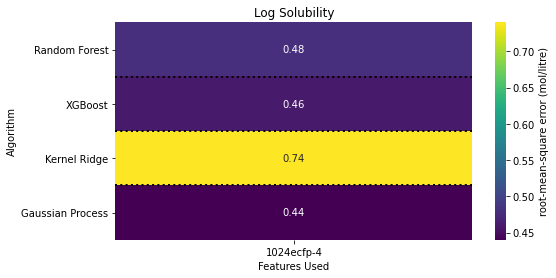

In [25]:
df = train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

In [26]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,1024ecfp-4
gp,1.14
krr,1.29
rf,1.29
xgb,1.24


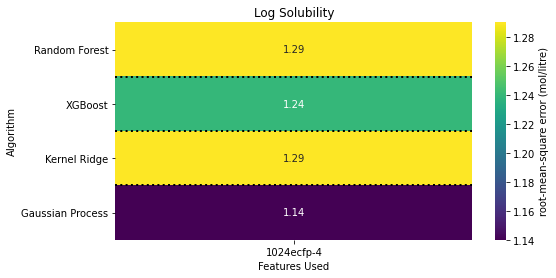

In [27]:
df = val_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Test metric

In [28]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (mol/litre)


,1024ecfp-4
gp,1.10
krr,1.30
rf,1.25
xgb,1.19


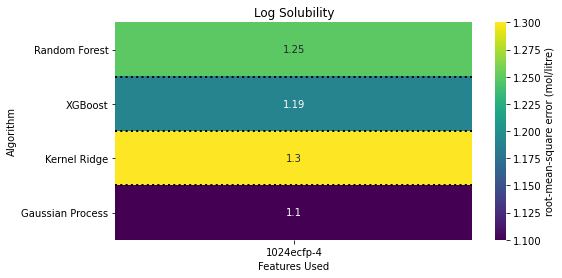

In [29]:
df = test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

# Creating a table with all the scores

## Train and test scores data frame

In [30]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,8.905563,0.019266,0.080491,0.011556,0.047364,0.003141,0.062661,0.002921,0.038886,0.001226
xgb,1.860030,0.005462,0.038863,0.002946,0.009521,0.004148,0.032840,0.000909,0.020282,0.000467
krr,0.034514,0.005809,0.094239,0.008759,0.054174,0.005039,0.069726,0.004070,0.042442,0.001986
gp,0.962676,0.014986,0.058079,0.035455,0.041514,0.022789,0.041200,0.007236,0.023572,0.003109


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [31]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,7.370299,0.018334,0.048943,0.021804,0.041703,0.026778
xgb,1.701333,0.006026,0.047846,0.051214,0.047338,0.029245
krr,0.037611,0.005068,0.058134,0.041398,0.047067,0.027222
gp,0.645523,0.016747,0.024117,0.027460,0.038079,0.023793


In [32]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.048943,0.021804,0.041703,0.026778
xgb,0.047846,0.051214,0.047338,0.029245
krr,0.058134,0.041398,0.047067,0.027222
gp,0.024117,0.027460,0.038079,0.023793


In [33]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [34]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [35]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.048943,0.021804,0.041703,0.026778
xgb,0.047846,0.051214,0.047338,0.029245
krr,0.058134,0.041398,0.047067,0.027222
gp,0.024117,0.027460,0.038079,0.023793


## All scores

In [36]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,8.905563,0.019266,0.080491,0.011556,0.047364,0.003141,0.062661,0.002921,0.038886,0.001226,0.048943,0.021804,0.041703,0.026778
xgb,1.860030,0.005462,0.038863,0.002946,0.009521,0.004148,0.032840,0.000909,0.020282,0.000467,0.047846,0.051214,0.047338,0.029245
krr,0.034514,0.005809,0.094239,0.008759,0.054174,0.005039,0.069726,0.004070,0.042442,0.001986,0.058134,0.041398,0.047067,0.027222
gp,0.962676,0.014986,0.058079,0.035455,0.041514,0.022789,0.041200,0.007236,0.023572,0.003109,0.024117,0.027460,0.038079,0.023793


In [37]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [38]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,8.905563,0.019266,0.011556,0.048943,0.080491,0.003141,0.021804,0.047364,0.002921,0.041703,0.062661,0.001226,0.026778,0.038886
xgb,1.860030,0.005462,0.002946,0.047846,0.038863,0.004148,0.051214,0.009521,0.000909,0.047338,0.032840,0.000467,0.029245,0.020282
krr,0.034514,0.005809,0.008759,0.058134,0.094239,0.005039,0.041398,0.054174,0.004070,0.047067,0.069726,0.001986,0.027222,0.042442
gp,0.962676,0.014986,0.035455,0.024117,0.058079,0.022789,0.027460,0.041514,0.007236,0.038079,0.041200,0.003109,0.023793,0.023572


## Presentable version

In [39]:
presentable_all_means = np.round(all_means, rp)
presentable_all_stds = np.round(all_stds, rp)

In [40]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

esol original reproducing

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,38.16,0.08,0.48,1.29,1.25,0.34,0.93,0.93,0.95,0.60,0.67,0.98,0.78,0.82
xgb,10.22,0.03,0.46,1.24,1.19,0.30,0.90,0.87,0.95,0.63,0.70,0.98,0.80,0.84
krr,0.17,0.03,0.74,1.29,1.30,0.53,0.96,0.96,0.87,0.60,0.64,0.94,0.78,0.80
gp,8.64,0.13,0.44,1.14,1.10,0.29,0.86,0.81,0.96,0.69,0.74,0.98,0.84,0.87


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,8.91,0.02,0.01,0.05,0.08,0.00,0.02,0.05,0.00,0.04,0.06,0.0,0.03,0.04
xgb,1.86,0.01,0.00,0.05,0.04,0.00,0.05,0.01,0.00,0.05,0.03,0.0,0.03,0.02
krr,0.03,0.01,0.01,0.06,0.09,0.01,0.04,0.05,0.00,0.05,0.07,0.0,0.03,0.04
gp,0.96,0.01,0.04,0.02,0.06,0.02,0.03,0.04,0.01,0.04,0.04,0.0,0.02,0.02


In [41]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,38.16 +/- 8.91,0.08 +/- 0.02,0.48 +/- 0.01,1.29 +/- 0.05,1.25 +/- 0.08,0.34 +/- 0.0,0.93 +/- 0.02,0.93 +/- 0.05,0.95 +/- 0.0,0.6 +/- 0.04,0.67 +/- 0.06,0.98 +/- 0.0,0.78 +/- 0.03,0.82 +/- 0.04
xgb,10.22 +/- 1.86,0.03 +/- 0.01,0.46 +/- 0.0,1.24 +/- 0.05,1.19 +/- 0.04,0.3 +/- 0.0,0.9 +/- 0.05,0.87 +/- 0.01,0.95 +/- 0.0,0.63 +/- 0.05,0.7 +/- 0.03,0.98 +/- 0.0,0.8 +/- 0.03,0.84 +/- 0.02
krr,0.17 +/- 0.03,0.03 +/- 0.01,0.74 +/- 0.01,1.29 +/- 0.06,1.3 +/- 0.09,0.53 +/- 0.01,0.96 +/- 0.04,0.96 +/- 0.05,0.87 +/- 0.0,0.6 +/- 0.05,0.64 +/- 0.07,0.94 +/- 0.0,0.78 +/- 0.03,0.8 +/- 0.04
gp,8.64 +/- 0.96,0.13 +/- 0.01,0.44 +/- 0.04,1.14 +/- 0.02,1.1 +/- 0.06,0.29 +/- 0.02,0.86 +/- 0.03,0.81 +/- 0.04,0.96 +/- 0.01,0.69 +/- 0.04,0.74 +/- 0.04,0.98 +/- 0.0,0.84 +/- 0.02,0.87 +/- 0.02


In [42]:
print(dataset, smile_type, grid_search_type)
print(metric, datasets_to_units[dataset])
presentable_all_means_stds_rmse = presentable_all_means_stds[['train_RMSE', 'val_RMSE', 'test_RMSE']]
presentable_all_means_stds_rmse = presentable_all_means_stds_rmse.round(rp)


display(presentable_all_means_stds_rmse)

esol original reproducing
RMSE (mol/litre)


,train_RMSE,val_RMSE,test_RMSE
rf,0.48 +/- 0.01,1.29 +/- 0.05,1.25 +/- 0.08
xgb,0.46 +/- 0.0,1.24 +/- 0.05,1.19 +/- 0.04
krr,0.74 +/- 0.01,1.29 +/- 0.06,1.3 +/- 0.09
gp,0.44 +/- 0.04,1.14 +/- 0.02,1.1 +/- 0.06


# Save results to csv files

## All results

In [43]:
presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)

In [44]:
presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)

In [45]:
presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)

## RMSE results (means +- stds)

In [46]:
presentable_all_means_stds_rmse.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds_rmse.csv', index=True)